Optimized Nelson-Siegel Parameters:
Beta0 (level): 8.5578
Beta1 (slope): -2.6604
Beta2 (curvature): -0.0000
Tau1 (decay factor): 4.2219


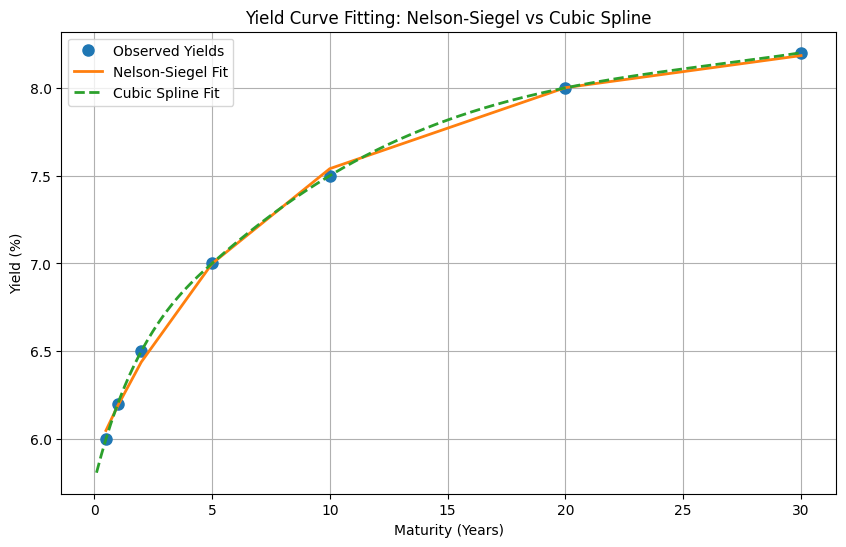

In [1]:
# Install required packages
!pip install nelson-siegel-svensson

import numpy as np
import matplotlib.pyplot as plt
from nelson_siegel_svensson import NelsonSiegelCurve
from scipy.interpolate import CubicSpline

# 2.a & 2.b: Set maturities and simulate South Africa yields (replace this with real data)
maturities = np.array([0.5, 1, 2, 5, 10, 20, 30])  # in years

# Simulated yields (%) — realistic shape: low short rates, hump around 5y, rising long term
yields = np.array([6.0, 6.2, 6.5, 7.0, 7.5, 8.0, 8.2])

# 2.c: Fit Nelson-Siegel Model
# Initial guess for parameters: beta0, beta1, beta2, tau1
params_init = [6, -1, 1, 2]
nelson_siegel = NelsonSiegelCurve(*params_init)
from scipy.optimize import minimize

def ns_objective(params, maturities, yields):
    ns_curve = NelsonSiegelCurve(*params)
    fitted = ns_curve(maturities)
    return np.sum((fitted - yields) ** 2)

result = minimize(ns_objective, params_init, args=(maturities, yields),
                  bounds=[(0, 10), (-10, 10), (-10, 10), (0.01, 10)])

params_opt = result.x
nelson_siegel_fitted = NelsonSiegelCurve(*params_opt)
yields_ns_fit = nelson_siegel_fitted(maturities)

print(f"Optimized Nelson-Siegel Parameters:\n"
      f"Beta0 (level): {params_opt[0]:.4f}\n"
      f"Beta1 (slope): {params_opt[1]:.4f}\n"
      f"Beta2 (curvature): {params_opt[2]:.4f}\n"
      f"Tau1 (decay factor): {params_opt[3]:.4f}")

# 2.d: Fit Cubic Spline Model
cs = CubicSpline(maturities, yields)
maturities_fine = np.linspace(0.1, 30, 300)
yields_cs_fit = cs(maturities_fine)

# 2.e: Plot & Compare

plt.figure(figsize=(10,6))
plt.plot(maturities, yields, 'o', label='Observed Yields', markersize=8)
plt.plot(maturities, yields_ns_fit, label='Nelson-Siegel Fit', linewidth=2)
plt.plot(maturities_fine, yields_cs_fit, label='Cubic Spline Fit', linewidth=2, linestyle='--')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Yield Curve Fitting: Nelson-Siegel vs Cubic Spline')
plt.legend()
plt.grid(True)
plt.show()